**TP : Étapes de Construction d'un CNN**

**Objectifs**:

    

1.   Comprendre le fonctionnement des convolutions, max pooling et des fonctions  d'activation.
2.   Implémenter ces concepts de manière pratique.
3.     Construire un réseau de neurones convolutif (CNN) étape par étape et l'appliquer sur un jeu de données simple.


    


**Étape 1 : Compréhension de la Convolution 2D**



1.       Commencez par expliquer la convolution en appliquant un filtre (par exemple, 3x3) sur une image en utilisant NumPy.
2.      Objectif : Observer comment un filtre appliqué à une image change celle-ci (par exemple, détecter les bords).






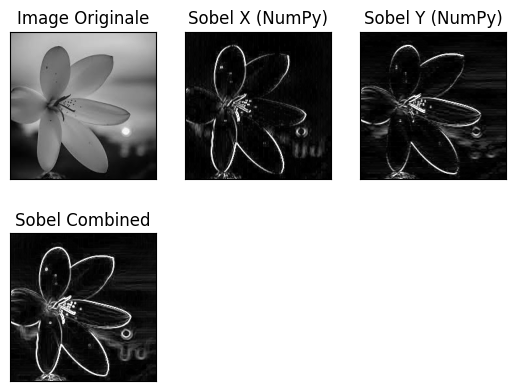

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Charger l'image en niveaux de gris
img = cv2.imread("/content/flower.jpeg", cv2.IMREAD_GRAYSCALE)

# Définir les filtres de Sobel
sobelX_filter = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

sobelY_filter = np.array([[-1, -2, -1],
                          [ 0,  0,  0],
                          [ 1,  2,  1]])

# Fonction de convolution
def apply_convolution(image, kernel):
    # Dimensions de l'image et du filtre
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Créer une image de sortie avec des bords réduits
    output = np.zeros((image_h - kernel_h + 1, image_w - kernel_w + 1))

    # Appliquer la convolution
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = image[i:i + kernel_h, j:j + kernel_w]
            output[i, j] = np.sum(region * kernel)

    return output

# Appliquer les filtres de convolution
sobelX = apply_convolution(img, sobelX_filter)
sobelY = apply_convolution(img, sobelY_filter)

# Combiner les résultats de Sobel en utilisant la magnitude
sobelCombined = np.sqrt(sobelX**2 + sobelY**2)

# Convertir les résultats en uint8 pour l'affichage
sobelX = np.uint8(np.clip(np.abs(sobelX), 0, 255))
sobelY = np.uint8(np.clip(np.abs(sobelY), 0, 255))
sobelCombined = np.uint8(np.clip(np.abs(sobelCombined), 0, 255))

# Afficher les images
titles = ['Image Originale', 'Sobel X (NumPy)', 'Sobel Y (NumPy)', 'Sobel Combined']
images = [img, sobelX, sobelY, sobelCombined]

for i in range(4):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


**Étape 2 : Max Pooling**


1.   Implémentez une couche de max pooling pour réduire la dimension de l'image tout en conservant les caractéristiques importantes.




Dimensions de l'image originale : (226, 223)
Dimensions de l'image après max pooling : (113, 111)


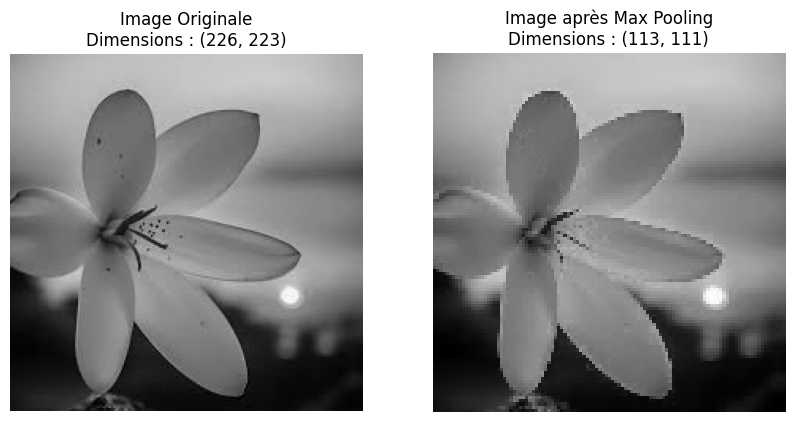

In [ ]:
# Fonction de Max Pooling
def max_pooling(image, pool_size=2, stride=2):
    # Dimensions de l'image
    image_h, image_w = image.shape

    # Taille de la sortie après le pooling
    output_h = (image_h - pool_size) // stride + 1
    output_w = (image_w - pool_size) // stride + 1
    pooled_image = np.zeros((output_h, output_w))

    # Appliquer le max pooling
    for i in range(0, image_h - pool_size + 1, stride):
        for j in range(0, image_w - pool_size + 1, stride):
            region = image[i:i + pool_size, j:j + pool_size]
            pooled_image[i // stride, j // stride] = np.max(region)

    return pooled_image

# Appliquer le max pooling sur l'image
pooled_img = max_pooling(img, pool_size=2, stride=2)

# Récupérer les dimensions des deux images
original_dimensions = img.shape
pooled_dimensions = pooled_img.shape

# Afficher les dimensions
print(f"Dimensions de l'image originale : {original_dimensions}")
print(f"Dimensions de l'image après max pooling : {pooled_dimensions}")

# Afficher l'image originale et l'image après max pooling
plt.figure(figsize=(10, 5))

# Image originale
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title(f"Image Originale\nDimensions : {original_dimensions}")
plt.axis("off")

# Image après max pooling
plt.subplot(1, 2, 2)
plt.imshow(pooled_img, cmap='gray')
plt.title(f"Image après Max Pooling\nDimensions : {pooled_dimensions}")
plt.axis("off")

plt.show()



Étape 3 : Fonction d'Activation

1. Implémentez des fonctions d'activation, comme ReLU (Rectified Linear Unit).



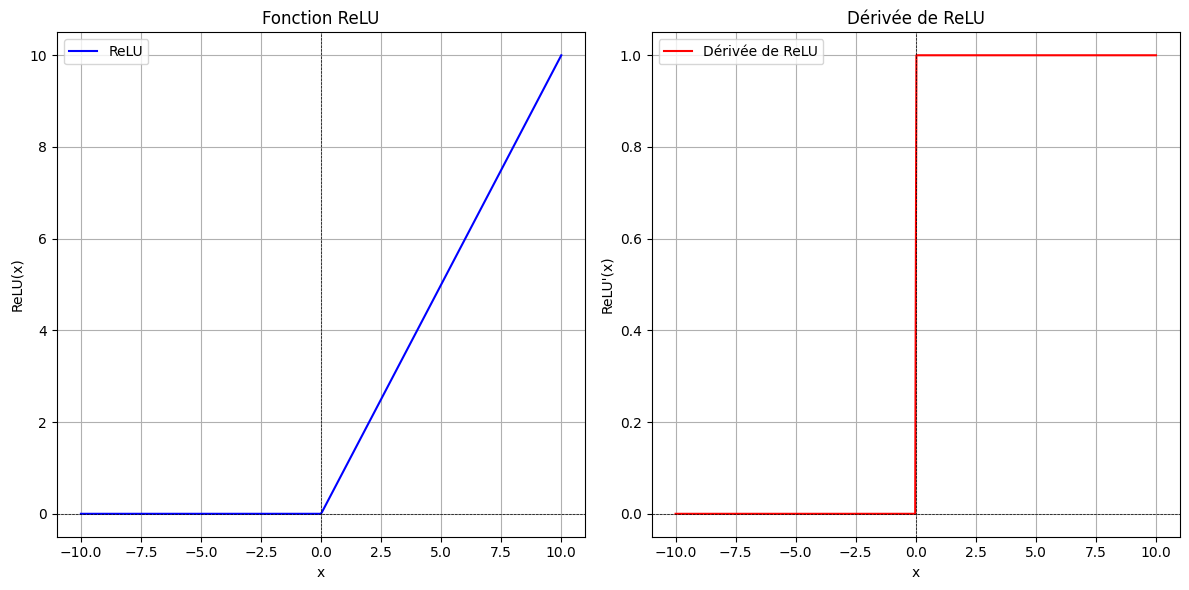

In [ ]:
#CODE ICI


# Fonction ReLU
def relu(x):
    return np.maximum(0, x)

# Dérivée de ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Créer des données pour visualiser la fonction ReLU et sa dérivée
x = np.linspace(-10, 10, 400)
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)

# Afficher les résultats
plt.figure(figsize=(12, 6))

# Graphique de la fonction ReLU
plt.subplot(1, 2, 1)
plt.plot(x, y_relu, label='ReLU', color='blue')
plt.title('Fonction ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()

# Graphique de la dérivée de ReLU
plt.subplot(1, 2, 2)
plt.plot(x, y_relu_derivative, label='Dérivée de ReLU', color='red')
plt.title('Dérivée de ReLU')
plt.xlabel('x')
plt.ylabel('ReLU\'(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Étape 4 : Construire un CNN avec Keras**

1. Utilisez les concepts précédents pour construire un CNN simple qui classifie les images du dataset MNIST (chiffres manuscrits).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.8422 - loss: 0.5534 - val_accuracy: 0.9785 - val_loss: 0.0721
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9791 - loss: 0.0667 - val_accuracy: 0.9818 - val_loss: 0.0580
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 109ms/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0.9869 - val_loss: 0.0445
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.9883 - val_loss: 0.0409
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.9917 - loss: 0.0281 - val_accuracy: 0.9857 - val_loss: 0.0474
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9842 - val_loss: 0.0524
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.9884 - val_loss: 0.0422
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9958 - loss: 0

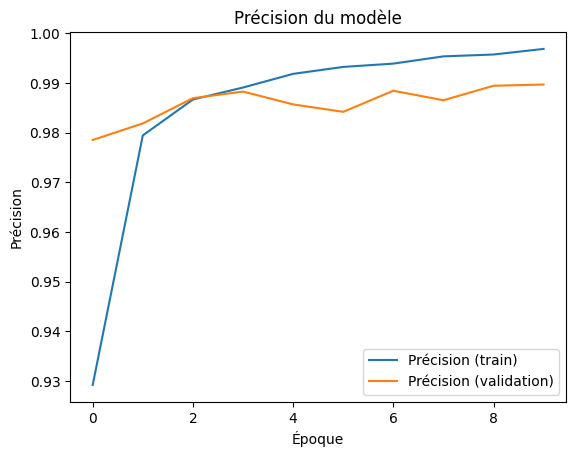

In [ ]:
#CODE ICI


# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prétraiter les données
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))  # Reshape pour (samples, height, width, channels)
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))    # Idem pour les données de test
x_train = x_train.astype('float32') / 255.0               # Normalisation
x_test = x_test.astype('float32') / 255.0

# Convertir les étiquettes en catégories
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construire le modèle CNN
model = Sequential()

# Couche de convolution
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Deuxième couche de convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplatir la sortie
model.add(Flatten())

# Couche dense
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes pour les chiffres 0-9

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Visualiser l'historique de l'entraînement
plt.plot(history.history['accuracy'], label='Précision (train)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Précision du modèle')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


**Étape 5 : Évaluation du Modèle**

1. Évaluer la performance du modèle sur le jeu de données de test.

In [ ]:
#CODE ICI

# Évaluer le modèle sur le jeu de données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Afficher les résultats
print(f"Perte sur le jeu de test: {test_loss:.4f}")
print(f"Précision sur le jeu de test: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9873 - loss: 0.0402
Perte sur le jeu de test: 0.0318
Précision sur le jeu de test: 0.9899


**Étape 6 : Visualisation des Prédictions**

1. Choisissez quelques exemples du jeu de données de test et affichez l'image, la prédiction du modèle et le label réel.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


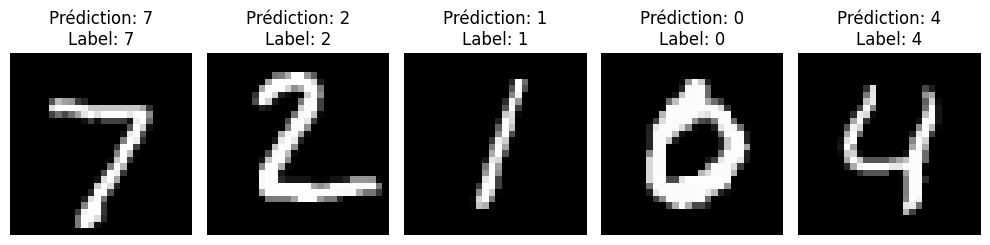

In [ ]:
#CODE ICI


# Prédire les étiquettes pour le jeu de test
predictions = model.predict(x_test)

# Obtenir les classes prédites et les classes réelles
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Nombre d'exemples à afficher
num_examples = 5

# Tracer les images avec les prédictions et les labels réels
plt.figure(figsize=(10, 4))

for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape l'image pour l'affichage
    plt.title(f"Prédiction: {predicted_classes[i]}\nLabel: {true_classes[i]}")
    plt.axis('off')  # Masquer les axes

plt.tight_layout()
plt.show()